#### Import both Databases with transfer and player data

In [1]:
import pandas as pd

player_transfer_df = pd.read_csv('/home/ricardo/Downloads/transfer_history_combined.csv') 
player_features_df = pd.read_csv('/home/ricardo/Downloads/players_combined.csv') 


player_features_df["last_name"]=+player_features_df["short_name"].str.extract(r'\b(\w+)$', expand=True)


player_features_df.head(2)

/home/ricardo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,FIFA year,last_name
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015,Messi
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015,Ronaldo


#### Creation of first_name list

In [2]:
split= player_features_df['long_name'].str.split(' ',1)

first_name=[]
first_names_list=[]

for index,value in split.items():
    first_name.append(value)

for i in range(len(first_name)):
    first_names_list.append(first_name[i][0])

first_names_list

['Lionel',
 'Cristiano',
 'Arjen',
 'Zlatan',
 'Manuel',
 'Luis',
 'Eden',
 'Robin',
 'Bastian',
 'Franck',
 'Radamel',
 'Gareth',
 'Robert',
 'Philipp',
 'Sergio',
 'Thiago',
 'David',
 'Luka',
 'James',
 'Neymar',
 'Thibaut',
 'Mats',
 'Ángel',
 'Marco',
 'Thomas',
 'Sergio',
 'Mesut',
 'Xavier',
 'Gnégnéri',
 'Wayne',
 'Vincent',
 'Mario',
 'Sergio',
 'Toni',
 'Karim',
 'Edinson',
 'Diego',
 'Arturo',
 'Hugo',
 'Javier',
 'Juan',
 'Jérôme',
 'Petr',
 'Carlos',
 'Gerard',
 'Arda',
 'Alexis',
 'Oscar',
 'Samir',
 'Medhi',
 'Sami',
 'Gonzalo',
 'Salvatore',
 'Iker',
 'Andrea',
 'Xabier',
 'Daniele',
 'Giorgio',
 'Wesley',
 'Santiago',
 'Klaas-Jan',
 'Francesc',
 'Diego',
 'Paul',
 'Francisco',
 'İlkay',
 'David',
 'Juan',
 'Daniel',
 'Miralem',
 'Aaron',
 'Pedro',
 'Ezequiel',
 'Blaise',
 'Stéphane',
 'Ivan',
 'Antonio',
 'Roman',
 'John',
 'Per',
 'Jérémy',
 'Képler',
 'Andrea',
 'Nemanja',
 'Javier',
 'Álvaro',
 'Daniel',
 'Jesús',
 'Diego',
 'Igor',
 'Jefferson',
 'João',
 'Samir',


#### Turn first name list into dataframe df and concatenate the dataframe with the original player features df. Now we have first and last name on the last 2 columns

In [3]:
df = pd.DataFrame (first_names_list, columns = ['first_name'])

player_features_concat_df = pd.concat([player_features_df,df], axis=1, sort=False) 
player_features_concat_df[["sofifa_id","short_name","long_name","age","last_name","first_name"]].head(5)

,sofifa_id,short_name,long_name,age,last_name,first_name
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,Messi,Lionel
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,Ronaldo,Cristiano
2,9014,A. Robben,Arjen Robben,30,Robben,Arjen
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,Ibrahimović,Zlatan
4,167495,M. Neuer,Manuel Neuer,28,Neuer,Manuel


#### Concatenate a new column with the full name and preprocess the data to lower case and remove accents

In [4]:
player_features_concat_df["player_name"]=player_features_concat_df["first_name"]+ " " +player_features_concat_df["last_name"]

player_features_concat_df["player_name"]=player_features_concat_df["player_name"].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
player_features_concat_df.drop(player_features_df.filter(regex="Unname"),axis=1, inplace=True)

In [5]:
player_features_concat_df[["sofifa_id","short_name","long_name","age","last_name","first_name","player_name"]].head(5)

,sofifa_id,short_name,long_name,age,last_name,first_name,player_name
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,Messi,Lionel,lionel messi
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,Ronaldo,Cristiano,cristiano ronaldo
2,9014,A. Robben,Arjen Robben,30,Robben,Arjen,arjen robben
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,Ibrahimović,Zlatan,zlatan ibrahimovic
4,167495,M. Neuer,Manuel Neuer,28,Neuer,Manuel,manuel neuer


#### Checking the nº of unique players in the features dataframe

In [6]:
player_features_concat_df.columns[:20]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate'],
      dtype='object')

In [7]:
player_features_concat_df["sofifa_id"].nunique()

36559

In [8]:
player_features_concat_df["long_name"].nunique()

37292

testing with zlatan ----concat_df[concat_df["player_name"]=="zlatan ibrahimovic"]

# Preprocessing player names in the transfer dataset

In [9]:
player_transfer_df["player_name"]=player_transfer_df["player_name"].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
player_transfer_df.drop(player_transfer_df.filter(regex="Unname"),axis=1, inplace=True)
player_transfer_df["FIFA year"]=player_transfer_df["year"]

## dropping NaNs in fee_cleaned
player_transfer_df = player_transfer_df.loc[player_transfer_df["fee_cleaned"].notna()]
## dropping 0.0 transfer fees
player_transfer_df = player_transfer_df.loc[player_transfer_df["fee_cleaned"]!=0]
## dropping in vs. out duplications
player_transfer_df = player_transfer_df.loc[player_transfer_df["transfer_movement"]=="in"]
player_transfer_df = player_transfer_df.loc[player_transfer_df["year"]>2014]

#### Checking nº of unique values in the transfer dataset

In [10]:
player_transfer_df["club_name"].nunique()

236

In [11]:
player_transfer_df["player_name"].value_counts().sum()

5460

In [12]:
player_transfer_df[player_transfer_df["player_name"]=="jese rodruguez"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,FIFA year


In [13]:
player_transfer_df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,FIFA year
125629,Paris Saint-Germain,angel di maria,27.0,Right Winger,Man Utd,£56.70m,in,Summer,56.70,Ligue 1,2015,2015/2016,2015
125630,Paris Saint-Germain,layvin kurzawa,22.0,Left-Back,Monaco,£22.50m,in,Summer,22.50,Ligue 1,2015,2015/2016,2015
125631,Paris Saint-Germain,serge aurier,22.0,Right-Back,Toulouse,£9.00m,in,Summer,9.00,Ligue 1,2015,2015/2016,2015
125632,Paris Saint-Germain,kevin trapp,25.0,Goalkeeper,E. Frankfurt,£8.55m,in,Summer,8.55,Ligue 1,2015,2015/2016,2015
125633,Paris Saint-Germain,benjamin stambouli,24.0,Centre-Back,Spurs,£7.74m,in,Summer,7.74,Ligue 1,2015,2015/2016,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174297,RCD Mallorca,dominik greif,24.0,Goalkeeper,Slo. Bratislava,£2.25m,in,Summer,2.25,Primera Division,2021,2021/2022,2021
174298,RCD Mallorca,pablo maffeo,24.0,Right-Back,VfB Stuttgart,Loan fee:£450Th.,in,Summer,0.45,Primera Division,2021,2021/2022,2021
174330,Rayo Vallecano,fran garcia,22.0,Left-Back,RM Castilla,£1.80m,in,Summer,1.80,Primera Division,2021,2021/2022,2021
174331,Rayo Vallecano,randy nteka,23.0,Attacking Midfield,CF Fuenlabrada,£1.17m,in,Summer,1.17,Primera Division,2021,2021/2022,2021


#### Merging tables by player name and FIFA year - inner join

In [14]:
merged_df = player_transfer_df.merge(player_features_concat_df, on=["player_name","FIFA year"], how='inner')

In [15]:
merged_df.head()

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name
0,Paris Saint-Germain,layvin kurzawa,22.0,Left-Back,Monaco,£22.50m,in,Summer,22.50,Ligue 1,...,74+0,74+0,77+0,76+0,74+0,74+0,74+0,76+0,Kurzawa,Layvin
1,Paris Saint-Germain,serge aurier,22.0,Right-Back,Toulouse,£9.00m,in,Summer,9.00,Ligue 1,...,76+0,76+0,77+0,77+0,77+0,77+0,77+0,77+0,Aurier,Serge
2,Paris Saint-Germain,kevin trapp,25.0,Goalkeeper,E. Frankfurt,£8.55m,in,Summer,8.55,Ligue 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trapp,Kevin
3,Paris Saint-Germain,benjamin stambouli,24.0,Centre-Back,Spurs,£7.74m,in,Summer,7.74,Ligue 1,...,76+0,76+0,72+0,72+0,74+0,74+0,74+0,72+0,Stambouli,Benjamin
4,Olympique Lyon,sergi darder,21.0,Central Midfield,Málaga CF,£11.79m,in,Summer,11.79,Ligue 1,...,71+0,71+0,68+0,66+0,66+0,66+0,66+0,66+0,Darder,Sergi


#### Checking unique player names with transfer data. Beware of in-out transfermovement duplicates, as well fees not being cleaned and transfer data from 1992 onwards

In [16]:
merged_df["player_name"].nunique()

2400

#### Attention : some players have several dozen records (several players with the same first and last name) while others have only one (transfer from/to outside europe). However as you can see below most players have less than 10 transfer records which is fine. Most will not have cleaned transfer fees as weel

In [17]:
merged_df.player_name.value_counts()

matheus pereira        7
gregoire defrel        6
joao pedro             6
simone zaza            6
matteo politano        6
                      ..
benjamin bourigeaud    1
racine coly            1
nicolas pallois        1
kalifa coulibaly       1
augusto solari         1
Name: player_name, Length: 2400, dtype: int64

(array([1.676e+03, 5.250e+02, 0.000e+00, 1.350e+02, 0.000e+00, 4.800e+01,
        8.000e+00, 0.000e+00, 7.000e+00, 1.000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

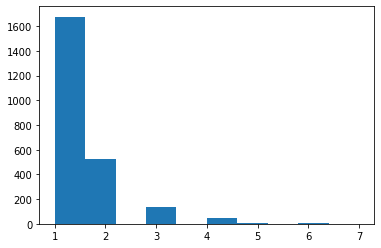

In [18]:
import matplotlib.pyplot as plt

plt.hist(merged_df.player_name.value_counts())

#### Around 3000 players with a numeric transfer fee

In [19]:
merged_df[merged_df["fee_cleaned"]>0.1]["player_name"].value_counts()

matheus pereira     7
simone zaza         6
ervin zukanovic     6
jeison murillo      6
joao pedro          6
                   ..
bingourou kamara    1
idriss saadi        1
gabriel silva       1
assane diousse      1
augusto solari      1
Name: player_name, Length: 2370, dtype: int64

In [20]:
merged_df[merged_df["player_name"]=="luis advincula"]

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name
2389,Rayo Vallecano,luis advincula,28.0,Right-Back,Tigres UANL,Loan fee:£315Th.,in,Summer,0.315,Primera Division,...,68+1,68+1,72+1,71+1,68+1,68+1,68+1,71+1,Advíncula,Luis


In [21]:
merged_df

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name
0,Paris Saint-Germain,layvin kurzawa,22.0,Left-Back,Monaco,£22.50m,in,Summer,22.50,Ligue 1,...,74+0,74+0,77+0,76+0,74+0,74+0,74+0,76+0,Kurzawa,Layvin
1,Paris Saint-Germain,serge aurier,22.0,Right-Back,Toulouse,£9.00m,in,Summer,9.00,Ligue 1,...,76+0,76+0,77+0,77+0,77+0,77+0,77+0,77+0,Aurier,Serge
2,Paris Saint-Germain,kevin trapp,25.0,Goalkeeper,E. Frankfurt,£8.55m,in,Summer,8.55,Ligue 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trapp,Kevin
3,Paris Saint-Germain,benjamin stambouli,24.0,Centre-Back,Spurs,£7.74m,in,Summer,7.74,Ligue 1,...,76+0,76+0,72+0,72+0,74+0,74+0,74+0,72+0,Stambouli,Benjamin
4,Olympique Lyon,sergi darder,21.0,Central Midfield,Málaga CF,£11.79m,in,Summer,11.79,Ligue 1,...,71+0,71+0,68+0,66+0,66+0,66+0,66+0,66+0,Darder,Sergi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,Atlético Madrid,moussa dembele,24.0,Centre-Forward,Olympique Lyon,Loan fee:£1.35m,in,Winter,1.35,Primera Division,...,51+2,51+2,52+2,49+2,48+2,48+2,48+2,49+2,Dembélé,Moussa
3408,Villarreal CF,etienne capoue,32.0,Defensive Midfield,Watford,£1.80m,in,Winter,1.80,Primera Division,...,78+2,78+2,75+2,74+2,77+2,77+2,77+2,74+2,Capoue,Etienne
3409,Real Sociedad,carlos fernandez,24.0,Centre-Forward,Sevilla FC,£9.00m,in,Winter,9.00,Primera Division,...,49+2,49+2,48+2,45+2,44+2,44+2,44+2,45+2,Fernández,Carlos
3410,Real Valladolid CF,lucas olaza,26.0,Left-Back,Boca Juniors,Loan fee:£450Th.,in,Winter,0.45,Primera Division,...,71+2,71+2,74+2,73+2,70+2,70+2,70+2,73+2,Olaza,Lucas


In [22]:
merged_df.to_csv("../raw_data/players_merged_by_name_data")